**Proyecto de IA** </br>

Raysa Karina Diaz
Codigo_ 2072871
Grupo H1

Observatorio de seguridad vial de Bucaramanga

> Se desea desarrollar y evaluar un modelo predictivo que de como resultado una estimación sobre el número de lesionados/heridos y fallecidos en siniestros viales a través del uso de algoritmos de inteligencia artificial.


Para llegar a la obtención de los modelos de predicción se ha de seguir una serie de pasos,
estos se detallan a continuación:
1. Tratamiento de datos: en este paso se realiza un pre-procesamiento de los datos, en el
cual se eliminan redundancias e inconsistencias para luego normalizar los datos para
facilitar las tareas posteriores.
2. Elección de la red neuronal artificial y algoritmo de entrenamiento: en esta etapa se
seleccionan el tipo de red usada para cada modelo.
3. Entrenamiento de la red: la red se entrena mediante, el entrenamiento se realiza
utilizando un 80% de los datos.
4. Testeo de la red: se obtienen los resultados de la estimación (número de
accidentes y número de personas fallecidas y lesionadas), para ello se utilizará el 20%
de los datos restantes que no se utilizaron para entrenamiento.
5. Conclusiones obtenidas por los diversos modelos.









In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive/Colab Notebooks/Proyecto IA 2023/")



Mounted at /content/gdrive
/content


# Librerias

In [2]:
#Cargar librerias
import numpy                 as np
import pandas                as pd
print(pd.__version__)
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import folium
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import random
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

#!pip install pyswarms
#from pyswarms.tf import topology as swarm no se deja instalar y no encuentra en colab
#optimizer = swarm.PSO esta aplicacion de algoritmo optimizador no se logra

#import optunity
#import optunity.metrics
#PySwarms y Optunity no son compatibles de forma nativa en Google Colab

%matplotlib inline
sns.set()


1.5.3


# Limpieza de datos

**Banco de datos:**
03. ACCIDENTES DE TRANSITO DESDE ENERO 2012 A 25 DE MARZO DE 2023
<Br> En la web de Datos Libres Colombia en el siguientes link:
[Ver Dataset aquí](https://www.datos.gov.co/Transporte/03-ACCIDENTES-DE-TRANSITO-DESDE-ENERO-2012-A-FEBRE/7cci-nqqb)

**Cantidad de registros:**

In [3]:
listings = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Proyecto IA 2023/03._ACCIDENTES_DE_TRANSITO_DESDE_ENERO_2012_A_25_MARZO_2023.csv', delimiter=',')
print(listings.shape)
#listings.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(38197, 26)


**Visualización previa**

In [4]:
pd.options.display.max_columns = 30
listings.head(100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ORDEN,FECHA,AÑO,MES,DÍA,GRAVEDAD,PEATON,AUTOMOVIL,CAMPAERO,CAMIONETA,MICRO,BUSETA,BUS,CAMION,VOLQUETA,MOTO,BICICLETA,OTRO,VIA 1,BARRIO,HORA,ENTIDAD,nombrecomuna,Propietario de Vehículo,DIURNIO/NOCTURNO,HORA RESTRICCION MOTO
0,1,01/01/2012,2012,01. Enero,07. Domingo,Con Heridos,0,1,0,0,0,0,0,0,0,0,0,0,CALLE,Mutis,12:15:00 p. m.,AGENTES DTB,17. MUTIS,Particular,Diurno,No aplica
1,2,01/01/2012,2012,01. Enero,07. Domingo,Solo Daños,0,1,0,1,0,0,0,0,0,0,0,0,VIA MATANZA,Regaderos Norte,02:00:00 p. m.,AGENTES DTB,02. NORORIENTAL,Empresa,Diurno,No aplica
2,3,01/01/2012,2012,01. Enero,07. Domingo,Solo Daños,0,0,0,1,0,0,0,0,0,0,0,0,CARRERA,Cabecera del Llano,12:00:00 p. m.,AGENTES DTB,12. CABECERA DEL LLANO,Particular,Diurno,No aplica
3,4,01/01/2012,2012,01. Enero,07. Domingo,Solo Daños,0,1,0,1,0,0,0,0,0,0,0,0,CARRERA,Norte Bajo,06:30:00 p. m.,AGENTES DTB,03. SAN FRANCISCO,Particular,Nocturno,No aplica
4,5,01/01/2012,2012,01. Enero,07. Domingo,Con Heridos,1,0,0,0,0,0,0,0,0,1,0,0,CARRERA,Dangond,12:30:00 a. m.,AGENTES DTB,11. SUR,Particular,Nocturno,En restricción
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,11/01/2012,2012,01. Enero,03. Miercoles,Con Heridos,1,1,0,0,0,0,0,0,0,0,0,0,TRANSVERSAL METROPOLITANA,CAMINO DEL PARQUE,08:45:00 p. m.,AGENTES DTB,11. SUR,Particular,Nocturno,No aplica
96,97,11/01/2012,2012,01. Enero,03. Miercoles,Solo Daños,0,1,0,1,0,0,0,0,0,0,0,0,CALLE,Sotomayor,10:10:00 p. m.,AGENTES DTB,12. CABECERA DEL LLANO,Empresa,Nocturno,No aplica
97,98,11/01/2012,2012,01. Enero,03. Miercoles,Solo Daños,0,1,1,0,0,0,0,0,0,0,0,0,CALLE,Cabecera del Llano,12:15:00 p. m.,AGENTES DTB,12. CABECERA DEL LLANO,Particular,Diurno,No aplica
98,99,12/01/2012,2012,01. Enero,04. Jueves,Con Heridos,0,0,0,0,0,0,0,0,0,1,0,0,ANILLO VIAL,Rio de Oro I,08:40:00 a. m.,AGENTES DTB,04. OCCIDENTAL,Particular,Diurno,Sin restricción


In [5]:
listings.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['ORDEN', 'FECHA', 'AÑO', 'MES', 'DÍA', 'GRAVEDAD', 'PEATON',
       'AUTOMOVIL', 'CAMPAERO', 'CAMIONETA', 'MICRO', 'BUSETA', 'BUS',
       'CAMION', 'VOLQUETA', 'MOTO', 'BICICLETA', 'OTRO', 'VIA 1', 'BARRIO',
       'HORA', 'ENTIDAD', 'nombrecomuna', 'Propietario de Vehículo',
       'DIURNIO/NOCTURNO', 'HORA RESTRICCION MOTO'],
      dtype='object')

In [6]:
listings[['MES', 'DÍA', 'GRAVEDAD']].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,MES,DÍA,GRAVEDAD
count,38197,38197,38197
unique,12,7,6
top,03. Marzo,06. Sabado,Solo Daños
freq,3366,6273,19475


Con esta descripción sencilla se observa que:


*   El día con mayor cantidad de siniestros viales es el Sabado con aprox el 16%.
*   El 51% de los siniestros reportan solo perdias materiales.
*   Lo que indica que en el 49% de los siniestros son personas heridas o fallecidas.
*   El mes con mayor ocurrencia de siniestros es Marzo.







In [7]:
listings = listings.drop_duplicates()
print(listings.shape)
#no hay registro duplicados
listings.drop(['FECHA'], axis = 1)

(38197, 26)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ORDEN,AÑO,MES,DÍA,GRAVEDAD,PEATON,AUTOMOVIL,CAMPAERO,CAMIONETA,MICRO,BUSETA,BUS,CAMION,VOLQUETA,MOTO,BICICLETA,OTRO,VIA 1,BARRIO,HORA,ENTIDAD,nombrecomuna,Propietario de Vehículo,DIURNIO/NOCTURNO,HORA RESTRICCION MOTO
0,1,2012,01. Enero,07. Domingo,Con Heridos,0,1,0,0,0,0,0,0,0,0,0,0,CALLE,Mutis,12:15:00 p. m.,AGENTES DTB,17. MUTIS,Particular,Diurno,No aplica
1,2,2012,01. Enero,07. Domingo,Solo Daños,0,1,0,1,0,0,0,0,0,0,0,0,VIA MATANZA,Regaderos Norte,02:00:00 p. m.,AGENTES DTB,02. NORORIENTAL,Empresa,Diurno,No aplica
2,3,2012,01. Enero,07. Domingo,Solo Daños,0,0,0,1,0,0,0,0,0,0,0,0,CARRERA,Cabecera del Llano,12:00:00 p. m.,AGENTES DTB,12. CABECERA DEL LLANO,Particular,Diurno,No aplica
3,4,2012,01. Enero,07. Domingo,Solo Daños,0,1,0,1,0,0,0,0,0,0,0,0,CARRERA,Norte Bajo,06:30:00 p. m.,AGENTES DTB,03. SAN FRANCISCO,Particular,Nocturno,No aplica
4,5,2012,01. Enero,07. Domingo,Con Heridos,1,0,0,0,0,0,0,0,0,1,0,0,CARRERA,Dangond,12:30:00 a. m.,AGENTES DTB,11. SUR,Particular,Nocturno,En restricción
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38192,38193,2023,02. Febrero,01. Lunes,Con muertos,0,0,0,0,0,0,0,0,0,0,0,0,AUTOPISTA FLORIDA,Diamante II,01:10:00 a. m.,AGENTES DE TRANSITO DTB,10. PROVENZA,Particular,Nocturno,Sin informacion
38193,38194,2023,02. Febrero,03. Miercoles,Con muertos,0,0,0,0,0,0,0,0,0,0,0,0,ANILLO VIAL,Rio de Oro I,03:40:00 p. m.,AGENTES DE TRANSITO DTB,04. OCCIDENTAL,Particular,Diurno,Sin informacion
38194,38195,2023,02. Febrero,05. Viernes,Con muertos,0,0,0,0,0,0,0,0,0,0,0,0,AVENIDA Q SECA,San Alonso,03:15:00 a. m.,AGENTES DE TRANSITO DTB,13. ORIENTAL,Empresa,Nocturno,Sin informacion
38195,38196,2023,02. Febrero,07. Domingo,Con muertos,0,0,0,0,0,0,0,0,0,0,0,0,CALLE,Campo Hermoso,11:30:00 p. m.,AGENTES DE TRANSITO DTB,05. GARCIA ROVIRA,Particular,Nocturno,Sin informacion


In [8]:
listings = listings.replace(['Con Heridos'], 'Heridos')
listings = listings.replace(['Con Muertos'], 'Muertes')
listings = listings.replace(['Solo Daños'], 'Daños')
listings = listings.replace(['Con heridos'], 'Heridos')
listings = listings.replace(['Con muertos'], 'Muertes')
listings = listings.replace(['Solo daños'], 'Daños')
listings = listings.replace(['01. Enero'], '1')
listings = listings.replace(['02. Febrero'], '2')
listings = listings.replace(['03. Marzo'], '3')
listings = listings.replace(['04. Abril'], '4')
listings = listings.replace(['05. Mayo'], '5')
listings = listings.replace(['06. Junio'], '6')
listings = listings.replace(['07. Julio'], '7')
listings = listings.replace(['08. Agosto'], '8')
listings = listings.replace(['09. Septiembre'], '9')
listings = listings.replace(['10. Octubre'], '10')
listings = listings.replace(['11. Noviembre'], '11')
listings = listings.replace(['12. Diciembre'], '12')
listings = listings.replace(['07. Domingo'], '7')
listings = listings.replace(['06. Sabado'], '6')
listings = listings.replace(['05. Viernes'], '5')
listings = listings.replace(['04. Jueves'], '4')
listings = listings.replace(['03. Miercoles'], '3')
listings = listings.replace(['02. Martes'], '2')
listings = listings.replace(['01. Lunes'], '1')
listings = listings.replace(['Heridos'], '2') #Heridos 2
listings = listings.replace(['Muertes'], '1') #Muertos 1
listings = listings.replace(['Daños'], '0') #Daños 0
listings = listings.replace(['Diurno'], '1') #dia
listings = listings.replace(['Nocturno'], '0') #
#Para este ejercicio no se usa otra heramienta, porque no fui capaz de hacerlas funcionar bien
#Use label_encoder = LabelEncoder() pero me daba errorValueError: Length of values (38197) does not match length of index (6)
#Cuando se usó el encoded_df = pd.get_dummies(df, columns=['feature1', 'feature2'])
#se crean demasiadas columnas... y hacer la codificacion de one-hot no aplica porque hay valores no vinarios dentro de las caracteristicas,
#Dos camionetas y una moto, o una cadena de vehiculos

#CAMBIO CATEGORIA
cat = listings[['nombrecomuna']]
ordinal_encoder = OrdinalEncoder(categories='auto')
encoded_data = ordinal_encoder.fit_transform(cat)
listings['comuna'] = encoded_data
listings.columns


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['ORDEN', 'FECHA', 'AÑO', 'MES', 'DÍA', 'GRAVEDAD', 'PEATON',
       'AUTOMOVIL', 'CAMPAERO', 'CAMIONETA', 'MICRO', 'BUSETA', 'BUS',
       'CAMION', 'VOLQUETA', 'MOTO', 'BICICLETA', 'OTRO', 'VIA 1', 'BARRIO',
       'HORA', 'ENTIDAD', 'nombrecomuna', 'Propietario de Vehículo',
       'DIURNIO/NOCTURNO', 'HORA RESTRICCION MOTO', 'comuna'],
      dtype='object')

# Algoritmo 1







Algoritmo de optimización "adam" como el optimizador en la compilación del modelo
(model.compile(loss='mean_squared_error', optimizer='adam'))



Epoch 1/100


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


764/764 [==============================] - 3s 3ms/step - loss: 0.9890 - accuracy: 0.0269 - val_loss: 0.9642 - val_accuracy: 0.0157
Epoch 2/100
764/764 [==============================] - 3s 3ms/step - loss: 0.9647 - accuracy: 0.0144 - val_loss: 0.9657 - val_accuracy: 0.0157
Epoch 3/100
764/764 [==============================] - 2s 2ms/step - loss: 0.9639 - accuracy: 0.0144 - val_loss: 0.9645 - val_accuracy: 0.0157
Epoch 4/100
764/764 [==============================] - 2s 2ms/step - loss: 0.9630 - accuracy: 0.0144 - val_loss: 0.9646 - val_accuracy: 0.0157
Epoch 5/100
764/764 [==============================] - 2s 2ms/step - loss: 0.9622 - accuracy: 0.0144 - val_loss: 0.9609 - val_accuracy: 0.0157
Epoch 6/100
764/764 [==============================] - 2s 2ms/step - loss: 0.9616 - accuracy: 0.0144 - val_loss: 0.9626 - val_accuracy: 0.0157
Epoch 7/100
764/764 [==============================] - 2s 2ms/step - loss: 0.9609 - accuracy: 0.0144 - val_loss: 0.9662 - val_accuracy: 0.0157
Epoch 8/100

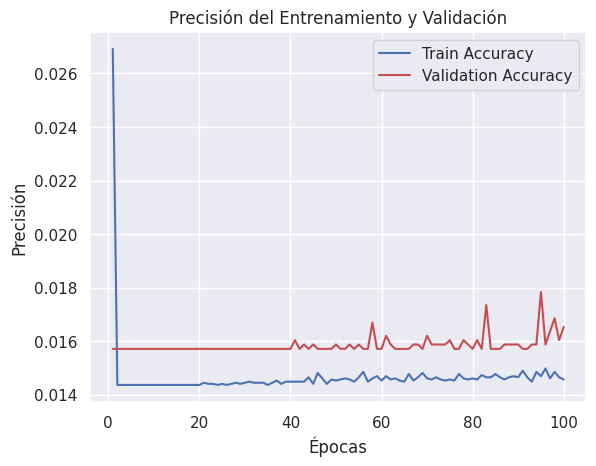

In [10]:
# Asignación de características
X = listings[['MES', 'DÍA', 'comuna', 'DIURNIO/NOCTURNO']].values
y = listings['GRAVEDAD'].values

# Conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Normalización de datos
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Arquitectura con optimizador adam
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilación y entrenamiento de la red neuronal
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Obtener las métricas de precisión
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Obtener el número de épocas
epochs = range(1, len(train_accuracy) + 1)

# Graficar la precisión del entrenamiento y la validación
plt.plot(epochs, train_accuracy, 'b', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Precisión del Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


In [ ]:
for i in range(10):
    print("Predicción:", predictions[i])
    print("Valor Real:", y_test[i])
    print()

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, predictions)
print("MAE:", mae)

threshold = 0.5
predicted_classes = [1 if pred >= threshold else 0 for pred in predictions]

# Métricas de clasificación
report = classification_report(y_test, predicted_classes)
print(report)

# Obtener el índice de la predicción más alta
indice_max_prediccion = np.argmax(predictions)

# Obtener los datos correspondientes a la predicción más alta
datos_prediccion_maxima = X_test[indice_max_prediccion]

# Convertir los datos de la predicción
informacion_prediccion = {
    'Mes': datos_prediccion_maxima[0],
    'Día': datos_prediccion_maxima[1],
    'Comuna': datos_prediccion_maxima[2],
    'Diurnio/Nocturno': datos_prediccion_maxima[3],
    'Gravedad': predictions[indice_max_prediccion]
}

print(informacion_prediccion)


Predicción: [1.2472769]
Valor Real: 0.0

Predicción: [0.89760035]
Valor Real: 0.0

Predicción: [0.89104974]
Valor Real: 0.0

Predicción: [0.92497677]
Valor Real: 0.0

Predicción: [0.8469915]
Valor Real: 0.0

Predicción: [0.81955165]
Valor Real: 0.0

Predicción: [0.8811437]
Valor Real: 2.0

Predicción: [1.062401]
Valor Real: 0.0

Predicción: [0.8445418]
Valor Real: 2.0

Predicción: [0.905665]
Valor Real: 0.0

MSE: 0.9552885763681439
MAE: 0.9584991735781675
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      3842
         1.0       0.02      1.00      0.03       121
         2.0       0.00      0.00      0.00      3677

    accuracy                           0.02      7640
   macro avg       0.01      0.33      0.01      7640
weighted avg       0.00      0.02      0.00      7640

{'Mes': 0.09090909090909091, 'Día': 0.9999999999999999, 'Comuna': 0.0, 'Diurnio/Nocturno': 0.0, 'Gravedad': array([1.5554891], dtype=float32)}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python

El MSE y el MAE de 0.9551 y 0.9595, respectivamente, indican que hay un nivel alto de error en las predicciones. Un MSE y MAE más bajo indicarían un mejor rendimiento y una menor discrepancia entre las predicciones y los valores reales.

El modelo tiene dificultades para clasificar correctamente las clases 0.0(Daños) y 2.0(Heridos), ya que la precisión y el recall son muy bajos para esas clases. El modelo tiene una mejor capacidad para identificar ejemplos de la clase 1.0(Muertes), pero aún así su rendimiento global es muy pobre.

Estos resultados sugieren que el modelo actual no está funcionando bien en este problema de clasificación y es necesario realizar ajustes o explorar otras técnicas o modelos para mejorar el rendimiento.

# Algoritmo 2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/100
764/764 [==============================] - 2s 2ms/step - loss: 0.9878 - accuracy: 0.0220 - val_loss: 0.9683 - val_accuracy: 0.0157
Epoch 2/100
764/764 [==============================] - 2s 2ms/step - loss: 0.9671 - accuracy: 0.0144 - val_loss: 0.9686 - val_accuracy: 0.0157
Epoch 3/100
764/764 [==============================] - 2s 3ms/step - loss: 0.9655 - accuracy: 0.0144 - val_loss: 0.9664 - val_accuracy: 0.0157
Epoch 4/100
764/764 [==============================] - 2s 3ms/step - loss: 0.9644 - accuracy: 0.0144 - val_loss: 0.9649 - val_accuracy: 0.0157
Epoch 5/100
764/764 [==============================] - 1s 2ms/step - loss: 0.9640 - accuracy: 0.0144 - val_loss: 0.9638 - val_accuracy: 0.0157
Epoch 6/100
764/764 [==============================] - 2s 2ms/step - loss: 0.9637 - accuracy: 0.0144 - val_loss: 0.9635 - val_accuracy: 0.0157
Epoch 7/100
764/764 [==============================] - 2s 2ms/step - loss: 0.9631 - accuracy: 0.0144 - val_loss: 0.9678 - val_accuracy: 0.0157

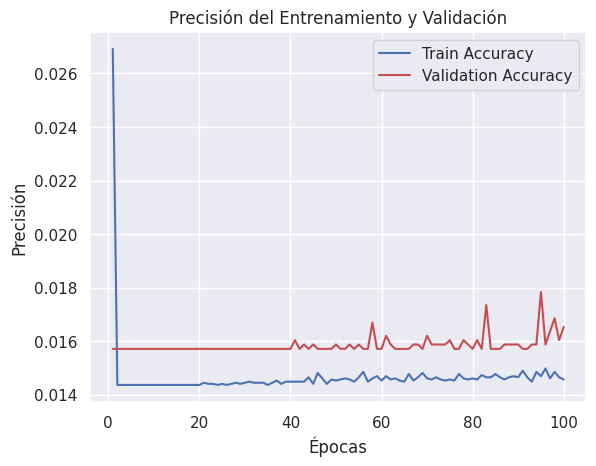

In [12]:
# Asignación de características
X = listings[['MES', 'DÍA', 'comuna', 'DIURNIO/NOCTURNO']].values
y = listings['GRAVEDAD'].values

# Conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Normalización de datos
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Arquitectura con optimizador SGD
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilación y entrenamiento de la red neuronal utilizando SGD
sgd = SGD(lr=0.01)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Revisión del modelo
loss = model.evaluate(X_test, y_test)

# Predicciones
predictions = model.predict(X_test)

# Obtener el número de épocas
epochs = range(1, len(train_accuracy) + 1)

# Graficar la precisión del entrenamiento y la validación
plt.plot(epochs, train_accuracy, 'b', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Precisión del Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


In [ ]:
for i in range(10):
    print("Predicción:", predictions[i])
    print("Valor Real:", y_test[i])
    print()

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, predictions)
print("MAE:", mae)

threshold = 0.5
predicted_classes = [1 if pred >= threshold else 0 for pred in predictions]

# Métricas de clasificación
report = classification_report(y_test, predicted_classes)
print(report)

informacion_prediccion = {
    'Mes': datos_prediccion_maxima[0],
    'Día': datos_prediccion_maxima[1],
    'Comuna': datos_prediccion_maxima[2],
    'Diurnio/Nocturno': datos_prediccion_maxima[3],
    'Gravedad': predictions[indice_max_prediccion]
}

print(informacion_prediccion)

Predicción: [1.2472769]
Valor Real: 0.0

Predicción: [0.89760035]
Valor Real: 0.0

Predicción: [0.89104974]
Valor Real: 0.0

Predicción: [0.92497677]
Valor Real: 0.0

Predicción: [0.8469915]
Valor Real: 0.0

Predicción: [0.81955165]
Valor Real: 0.0

Predicción: [0.8811437]
Valor Real: 2.0

Predicción: [1.062401]
Valor Real: 0.0

Predicción: [0.8445418]
Valor Real: 2.0

Predicción: [0.905665]
Valor Real: 0.0

MSE: 0.9552885763681439
MAE: 0.9584991735781675
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      3842
         1.0       0.02      1.00      0.03       121
         2.0       0.00      0.00      0.00      3677

    accuracy                           0.02      7640
   macro avg       0.01      0.33      0.01      7640
weighted avg       0.00      0.02      0.00      7640

{'Mes': 0.09090909090909091, 'Día': 0.9999999999999999, 'Comuna': 0.0, 'Diurnio/Nocturno': 0.0, 'Gravedad': array([1.5554891], dtype=float32)}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python

El MSE y el MAE de 0.9552 y 0.9584, respectivamente, indican que hay un nivel alto de error en las predicciones. Un MSE y MAE más bajo indicarían un mejor rendimiento y una menor discrepancia entre las predicciones y los valores reales.

Estos resultados sugieren que el modelo actual no está funcionando bien en este problema de clasificación y es necesario realizar ajustes o explorar otras técnicas o modelos para mejorar el rendimiento.

# Graficas

**POLIGONO DE FRECUENCIAS**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


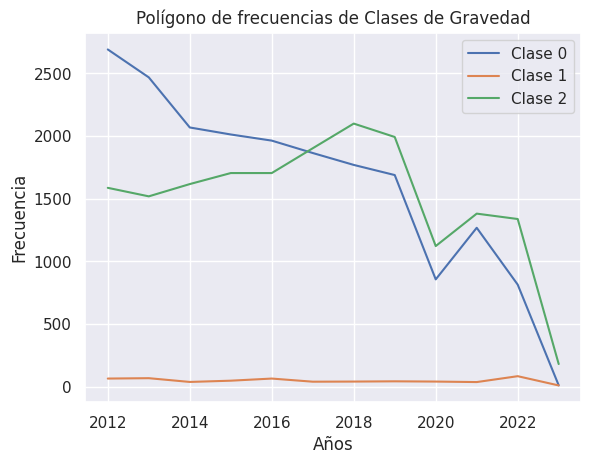

In [ ]:
# Agrupar y contar las frecuencias por años y gravedad
frecuencias = listings.groupby(['AÑO', 'GRAVEDAD']).size().unstack(fill_value=0)

# Graficar el polígono de frecuencias para cada clase de gravedad
for clase in frecuencias.columns:
    plt.plot(frecuencias.index, frecuencias[clase], label=f'Clase {clase}')

# Configurar etiquetas y título
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.title('Polígono de frecuencias de Clases de Gravedad')
plt.legend()

# Mostrar el gráfico
plt.show()


**GRAVEDAD DE LOS SINIESTROS**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


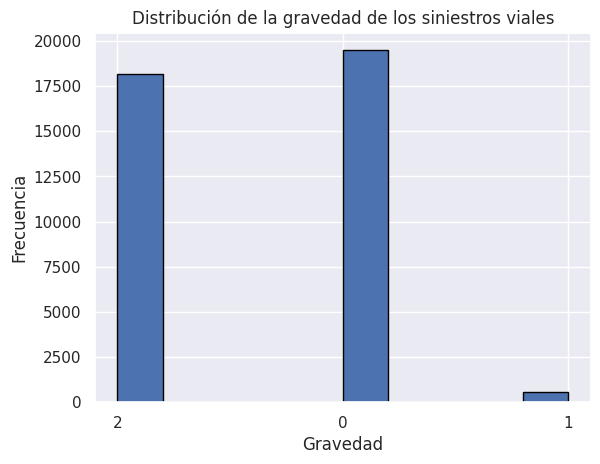

In [ ]:
# Gravedad de los siniestros
gravedad = listings['GRAVEDAD']

# Crear histograma
plt.hist(gravedad, bins=10, edgecolor='black')

# Configurar etiquetas y título
plt.xlabel('Gravedad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la gravedad de los siniestros viales')

# Mostrar el histograma
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


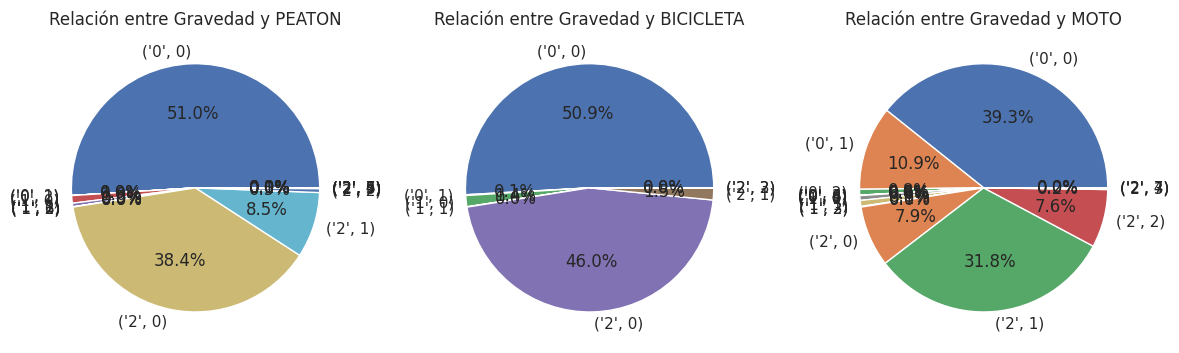

In [ ]:
# Calcular las frecuencias de las combinaciones de gravedad y cada modo de transporte
frecuencias_modo_1 = listings.groupby(['GRAVEDAD', 'PEATON']).size()
frecuencias_modo_2 = listings.groupby(['GRAVEDAD', 'BICICLETA']).size()
frecuencias_modo_3 = listings.groupby(['GRAVEDAD', 'MOTO']).size()

# Crear el gráfico de pastel para cada modo de transporte
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].pie(frecuencias_modo_1, labels=frecuencias_modo_1.index, autopct='%1.1f%%')
axs[0].set_title('Relación entre Gravedad y PEATON')

axs[1].pie(frecuencias_modo_2, labels=frecuencias_modo_2.index, autopct='%1.1f%%')
axs[1].set_title('Relación entre Gravedad y BICICLETA')

axs[2].pie(frecuencias_modo_3, labels=frecuencias_modo_3.index, autopct='%1.1f%%')
axs[2].set_title('Relación entre Gravedad y MOTO')

plt.tight_layout()

# Mostrar los gráficos
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


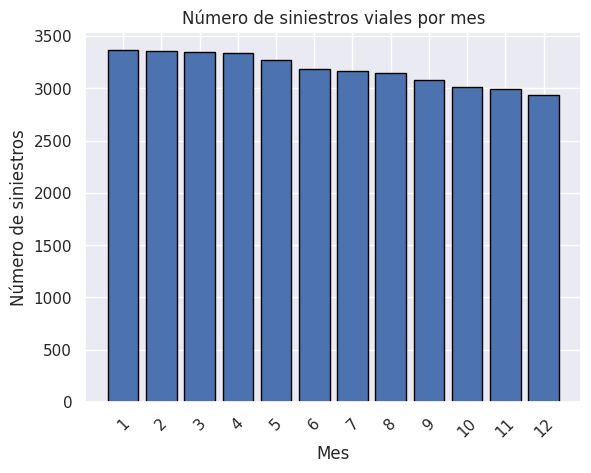

In [ ]:
# Número de siniestros por mes
meses = ['1', '2', '3', '4','5','6','7','8','9','10', '11','12']  # Reemplaza con los nombres reales de los meses
num_siniestros_por_mes = listings['MES'].value_counts()

# Crear gráfico de barras
plt.bar(meses, num_siniestros_por_mes,  edgecolor='black')

# Configurar etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Número de siniestros')
plt.title('Número de siniestros viales por mes')

# Ajustar la orientación de las etiquetas del eje x
plt.xticks(rotation=45)

# Mostrar el gráfico de barras
plt.show()

# Conclusiones

El desbalance en el dataset, especialmente en la revisión y uso de las variables de salida, variables categoricas, afecta los resultados de los análisis. Esto hace que los métodos de Inteligencia Artificial, así como las gráficas y el preprocesamiento de datos, no muestren diferencias significativas en los resultados. Por lo tanto, no se logra una clasificación efectiva de los datos.

Pese a que implementa una red neuronal de tres capas con dos diferentes algoritmos de optimización muestra resultados similares. Consecuencia de la falta de balance en los datos y a la dificultad del modelo para reconocer y clasificar las clases mayoritarias. Las métricas muestran un rendimiento deficiente, con altos niveles de error en ambos algoritmos, casi que mismos resultados.

Se identifica la necesidad de replantear el modelo y considerar otros métodos de análisis debido a los resultados insatisfactorios. La falta de flexibilidad en el manejo de variables categóricas, como la imposibilidad de aplicar herramientas vistas en clase, codificación (encoded_df = pd.get_dummies)/One-Hot o la herramienta LabelEncoder() y  debido a la naturaleza de los datos, dificulta el análisis y la implementación de algoritmos.

Se encuentra que se mencionaron herramientas como PSO (Optimización por Enjambre de Partículas) y ACO (Optimización por Colonias de Hormigas) como posibles opciones para el análisis, no fue posible implementarlos debido a la falta de disponibilidad de las librerías necesarias en el entorno utilizado. Se optó por utilizar algoritmos más sencillos y eficientes, adecuados para los datos proporcionados. PySwarms y Optunity no son compatibles de forma nativa en Google Colab.

Es importante destacar que el dataset utilizado está incompleto en términos usarlo para hacer analisis de datos de siniestros viales. Ya que es necesario considerar los indicadores como: demográficos, panoramas de riesgos, datos de fallecidos, lesiones, entre otros, y es evidente la falta de desagregación de variables importantes, como grupo etario y género, limita la capacidad de análisis y la perspectiva de salud pública en relación a la seguridad vial.

Estas conclusiones resaltan los desafíos y limitaciones encontrados y sugieren la necesidad de obtener un dataset más completo y adecuado para realizar análisis significativos y obtener conclusiones relevantes en el ámbito de la salud pública y la seguridad vial.

